In [1]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from datetime import datetime
import numpy as np
import os

In [2]:
DATASET_URL = "./forest_fires.csv"
FEATURES = [
	"x",
	"y",
	"month",
	"day",
	"ffmc",
	"dmc",
	"dc",
	"isi",
	"temp",
	"rh",
	"wind",
	"rain"
]
LABEL = "area"
COLUMNS = FEATURES + [LABEL]
DTYPE={
	"x": "category",
	"y": "category",
	"month": "category",
	"day": "category",
	"ffmc": "float32",
	"dmc": "float32",
	"dc": "float32",
	"isi": "float32",
	"temp": "float32",
	"rh": "float32",
	"wind": "float32",
	"rain": "float32",
	"area": "float32"
}
TEST_SET_SIZE=0.2
SHUFFLE_SIZE=512
BATCH_SIZE=50
SEED=1
COLUMNS

['x',
 'y',
 'month',
 'day',
 'ffmc',
 'dmc',
 'dc',
 'isi',
 'temp',
 'rh',
 'wind',
 'rain',
 'area']

In [3]:
tf.random.set_seed(SEED)
random.seed(SEED)

In [4]:
data = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), DATASET_URL), names=COLUMNS, dtype=DTYPE, index_col=False, skipinitialspace=True, skiprows=1)
data.head()

,x,y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.199997,26.200001,94.300003,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.599998,35.400002,669.099976,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.599998,43.700001,686.900024,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.699997,33.299999,77.500000,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.300003,51.299999,102.199997,9.6,11.4,99.0,1.8,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   x       517 non-null    category
 1   y       517 non-null    category
 2   month   517 non-null    category
 3   day     517 non-null    category
 4   ffmc    517 non-null    float32 
 5   dmc     517 non-null    float32 
 6   dc      517 non-null    float32 
 7   isi     517 non-null    float32 
 8   temp    517 non-null    float32 
 9   rh      517 non-null    float32 
 10  wind    517 non-null    float32 
 11  rain    517 non-null    float32 
 12  area    517 non-null    float32 
dtypes: category(4), float32(9)
memory usage: 21.8 KB


In [6]:
# Missing values
data = data.dropna()
data.isna().sum()

x        0
y        0
month    0
day      0
ffmc     0
dmc      0
dc       0
isi      0
temp     0
rh       0
wind     0
rain     0
area     0
dtype: int64

In [7]:
# Normalise Features
for feature in FEATURES:
    if data[feature].dtype == "float32":
        # min_max_scaler = preprocessing.MinMaxScaler()
        # data[[feature]] = min_max_scaler.fit_transform(data[[feature]])
        standard_scaler = preprocessing.StandardScaler()
        data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,517.000000
mean,5.315924e-09,8.209870e-10,5.656389e-09,-1.311417e-08,1.098537e-08,9.021399e-09,-4.510700e-09,-1.758164e-09,12.847292
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000968e+00,63.655819
min,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,0.000000
25%,-8.063502e-02,-6.606652e-01,-4.448280e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,0.000000
50%,1.732290e-01,-4.020250e-02,4.691191e-01,-1.364775e-01,7.082064e-02,-1.403660e-01,-9.833716e-03,-7.326831e-02,0.520000
75%,4.089602e-01,4.927388e-01,6.696629e-01,3.904086e-01,6.741642e-01,5.344111e-01,4.929824e-01,-7.326831e-02,6.570000
max,1.007352e+00,2.819864e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007062e+00,2.157228e+01,1090.839966


In [8]:
# Normalise Label
min_max_scaler = preprocessing.MinMaxScaler()
data[[LABEL]] = min_max_scaler.fit_transform(data[[LABEL]])
# standard_scaler = preprocessing.StandardScaler()
# data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,517.000000
mean,5.315924e-09,8.209870e-10,5.656389e-09,-1.311417e-08,1.098537e-08,9.021399e-09,-4.510700e-09,-1.758164e-09,0.011777
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000968e+00,0.058355
min,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,0.000000
25%,-8.063502e-02,-6.606652e-01,-4.448280e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,0.000000
50%,1.732290e-01,-4.020250e-02,4.691191e-01,-1.364775e-01,7.082064e-02,-1.403660e-01,-9.833716e-03,-7.326831e-02,0.000477
75%,4.089602e-01,4.927388e-01,6.696629e-01,3.904086e-01,6.741642e-01,5.344111e-01,4.929824e-01,-7.326831e-02,0.006023
max,1.007352e+00,2.819864e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007062e+00,2.157228e+01,1.000000


In [9]:
# Set categories
for column in COLUMNS:
	if data[column].dtype.name == "category":
		labelencoder = preprocessing.LabelEncoder()
		data[column] = labelencoder.fit_transform(data[column])
		categories=data[column].unique()
		data[column] = data[column].astype(pd.CategoricalDtype(categories=categories))
		print(data[column].cat.categories.tolist())

[6, 7, 5, 4, 3, 1, 8, 0, 2]
[3, 2, 4, 1, 0, 6, 5]
[7, 10, 1, 11, 0, 6, 5, 3, 4, 2, 8, 9]
[0, 5, 2, 3, 1, 6, 4]


In [10]:
data = data.astype(dtype=DTYPE)
data.dtypes

x        category
y        category
month    category
day      category
ffmc      float32
dmc       float32
dc        float32
isi       float32
temp      float32
rh        float32
wind      float32
rain      float32
area      float32
dtype: object

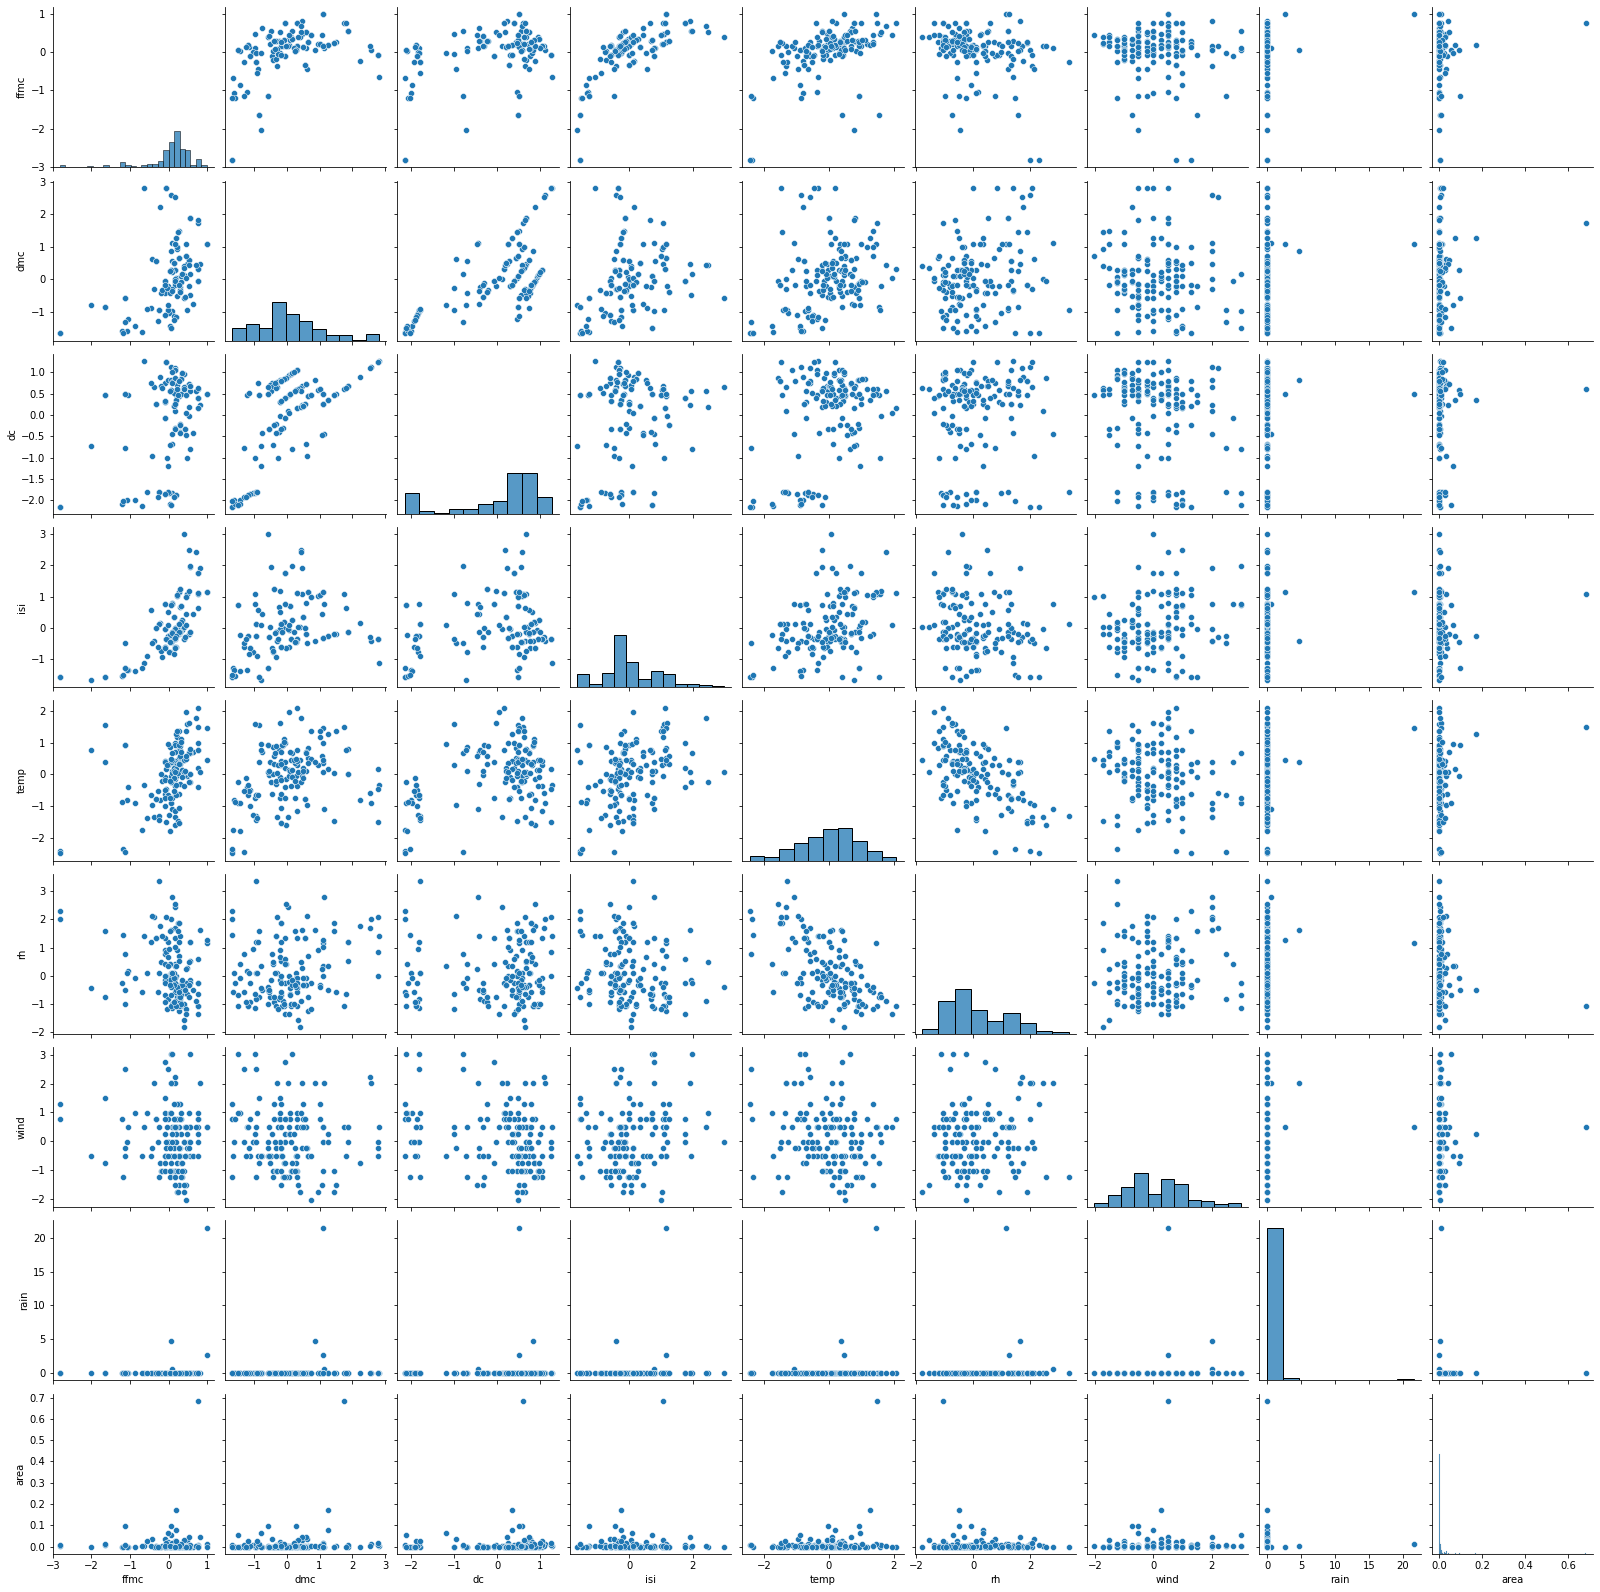

In [13]:
sns.pairplot(data.sample(n=150, random_state=1))

In [14]:
target = data.pop(LABEL)
target

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    0.005904
513    0.049769
514    0.010231
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float32

In [15]:
data = pd.get_dummies(data, dtype="float32")
data

,ffmc,dmc,dc,isi,temp,rh,wind,rain,x_6,x_7,...,month_2,month_8,month_9,day_0,day_5,day_2,day_3,day_1,day_6,day_4
0,-0.805960,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.008102,-1.049822,0.560716,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.243832,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=TEST_SET_SIZE)

# Set training dataset
train = tf.data.Dataset.from_tensor_slices(
		(train_x.values, train_y.values))
train = train.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
train = train.batch(BATCH_SIZE)

# Set testing dataset
test = tf.data.Dataset.from_tensor_slices(
		(test_x.values, test_y.values))
test = test.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
test = test.batch(BATCH_SIZE)